In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump

In [301]:
# load insurance data
insurance_df = pd.read_csv('insurance.csv')
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Insurance EDA

In [122]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [302]:
# distinguish categorical and numerical features
categorical_features = []
numerical_features = []


for col in insurance_df.columns:
    if pd.api.types.is_categorical_dtype(insurance_df[col]) or insurance_df[col].dtype == 'object':
        categorical_features.append(col)

for col in insurance_df.columns:
    if pd.api.types.is_categorical_dtype(insurance_df[col]) or insurance_df[col].dtype != 'object':
        numerical_features.append(col)

print(f"Categorical features: {categorical_features}")
print(f"\nNumerical features: {numerical_features}\n")

Categorical features: ['sex', 'smoker', 'region']

Numerical features: ['age', 'bmi', 'children', 'charges']



/var/folders/jf/9cfc0stn05v519631ltpqjmm0000gn/T/ipykernel_71317/3596226994.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(insurance_df[col]) or insurance_df[col].dtype == 'object':
/var/folders/jf/9cfc0stn05v519631ltpqjmm0000gn/T/ipykernel_71317/3596226994.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(insurance_df[col]) or insurance_df[col].dtype != 'object':


In [255]:
# get the summary statistics for the numerical columns
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [303]:
# get the number of unique values for the categorical features
data_rows = []

for cat in categorical_features:
    distinct_values = insurance_df[cat].nunique()
    # Append a dictionary representing the current row to the list
    data_rows.append({'Feature': cat, 'Unique Values': distinct_values})

# convert the list of dictionaries into a dataFrame
output_df = pd.DataFrame(data_rows)
output_df

,Feature,Unique Values
0,sex,2
1,smoker,2
2,region,4


In [304]:
# calculate the percentage of missing values per column
missing_data_rows = []
total_rows = len(insurance_df)

for num in insurance_df.columns:
    missing_values_count = insurance_df[num].isnull().sum()
    percentage_missing_per_column = round((missing_values_count / total_rows) * 100)
    missing_data_rows.append({'Feature': num,'Missing Values Count': missing_values_count,'Percentage Missing': f"{percentage_missing_per_column}%"})

# convert the list of dictionaries into a dataFrame
missing_output_df = pd.DataFrame(missing_data_rows)
missing_output_df

,Feature,Missing Values Count,Percentage Missing
0,age,0,0%
1,sex,0,0%
2,bmi,0,0%
3,children,0,0%
4,smoker,0,0%
5,region,0,0%
6,charges,0,0%


Since there are no missing values in the datasets, there is no need for imputation.

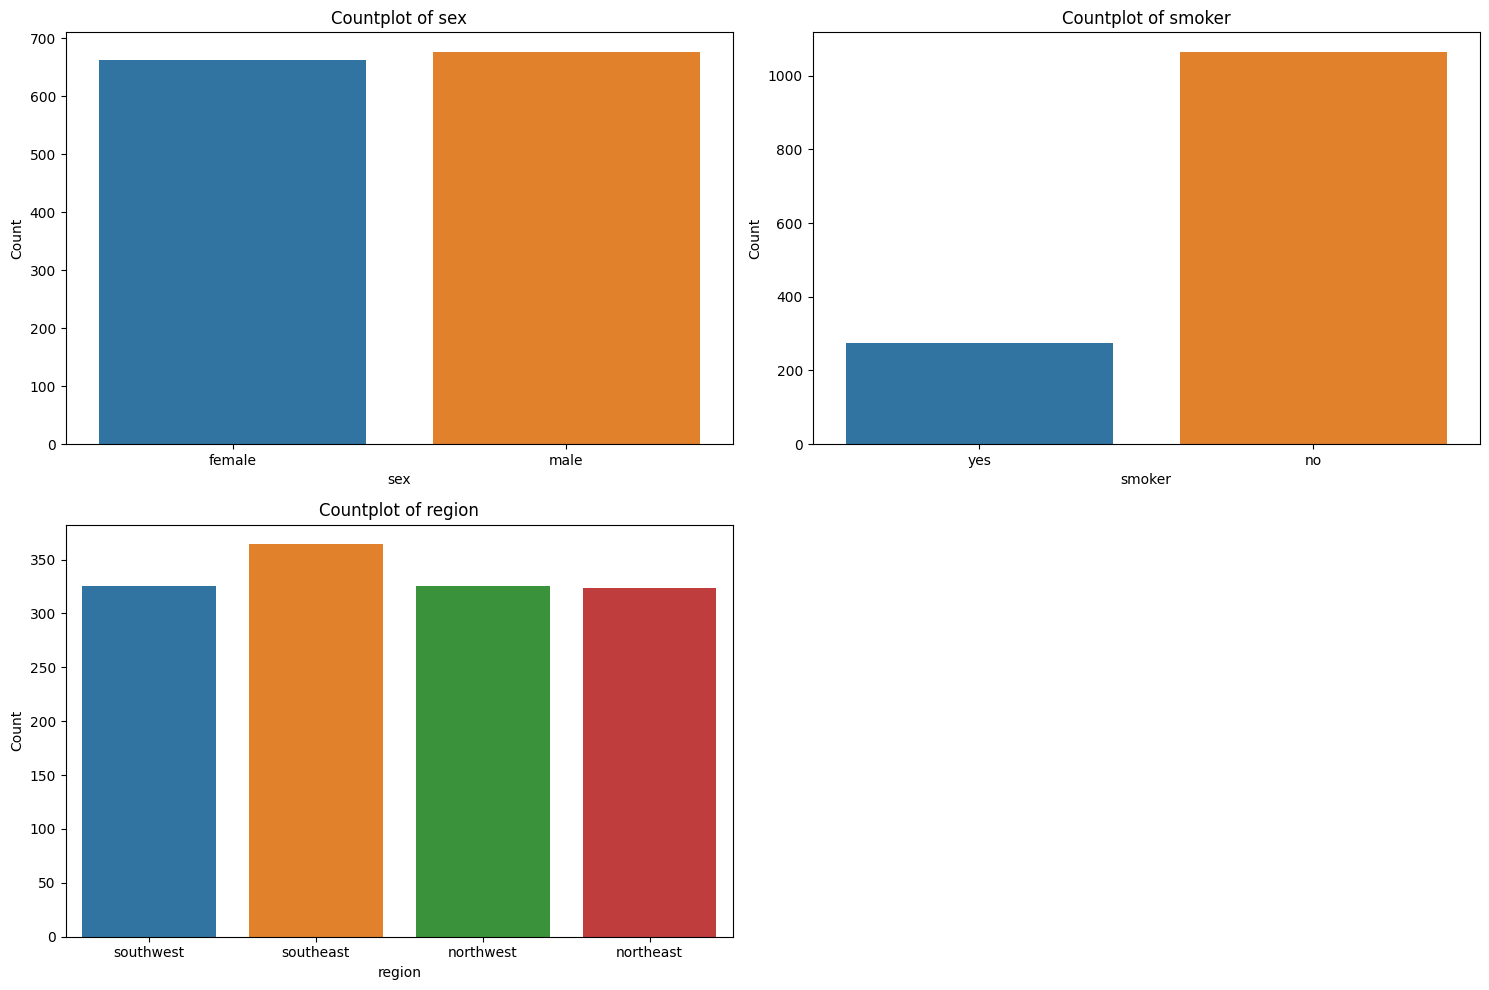

In [305]:
categorical_insurance_df = insurance_df[categorical_features]
num_rows = (len(categorical_insurance_df.columns) + 1) // 2

# create a new figure with the specified number of subplots
plt.figure(figsize=(15, 5 * num_rows))

# iterate over each categorical column and create a countplot in the corresponding subplot
for i, column in enumerate(categorical_insurance_df.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=column, data=categorical_insurance_df)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# adjust the layout to prevent overlap
plt.tight_layout()

# show the plot
plt.show()

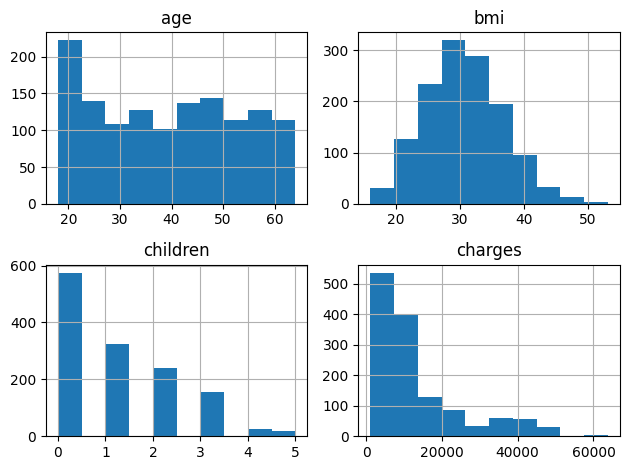

In [306]:
numerical_insurance_df = insurance_df[numerical_features]

# plot the distribution of numerical features
numerical_insurance_df.hist()
plt.tight_layout()

/Users/lalehhaidari/.pyenv/versions/3.12.1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lalehhaidari/.pyenv/versions/3.12.1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lalehhaidari/.pyenv/versions/3.12.1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lalehhaidari/.pyenv/versions/3.12.1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

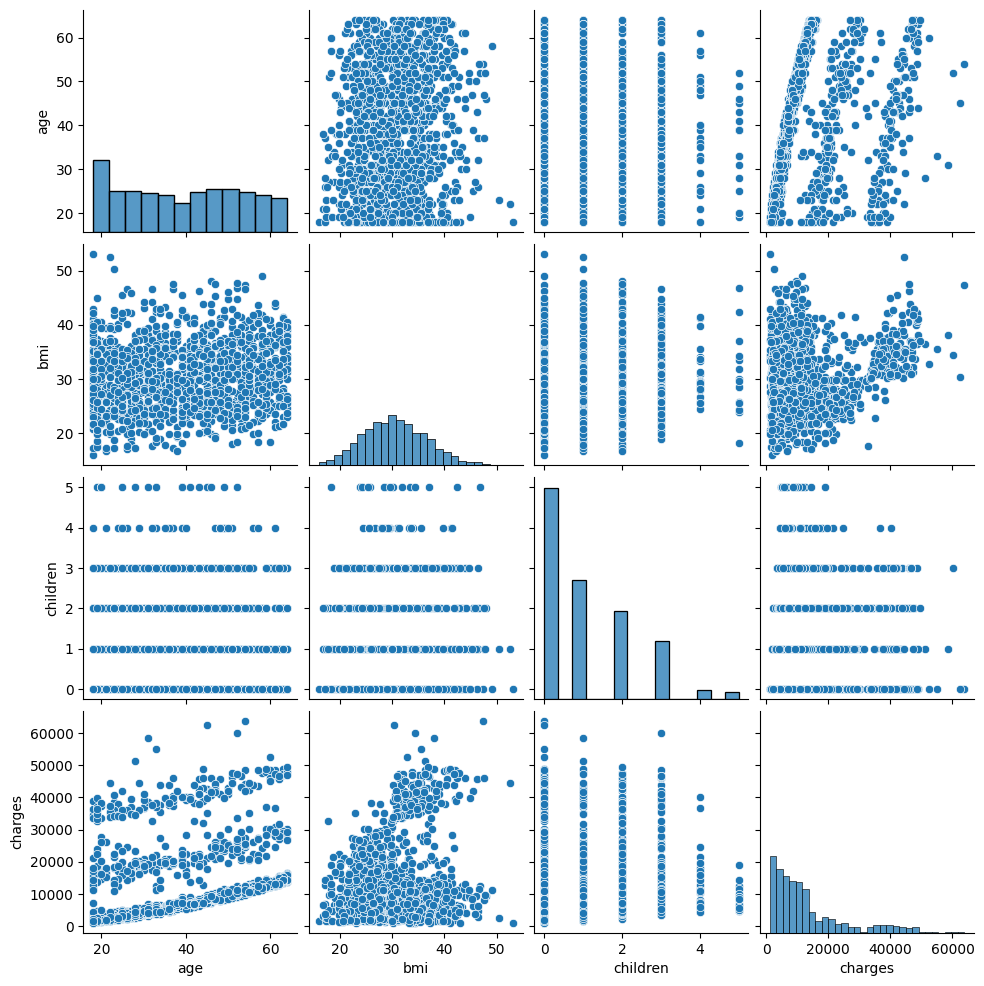

In [307]:
# Plot the distribution of the data
sns.pairplot(data=numerical_insurance_df)

<Axes: >

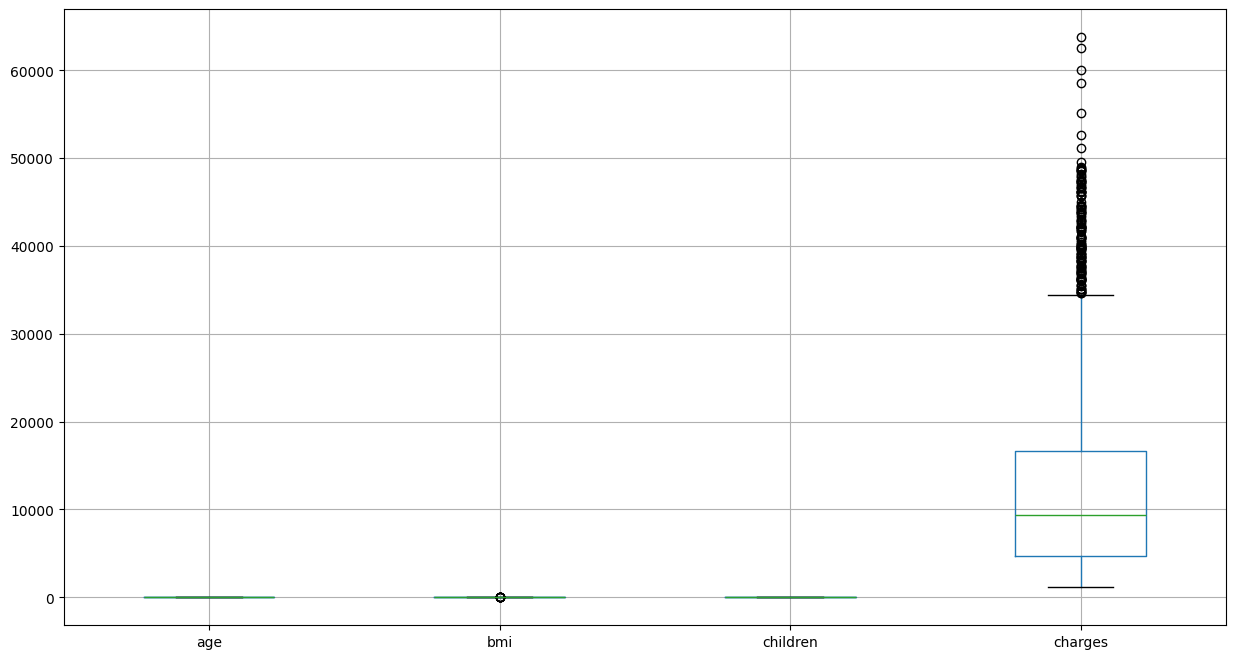

In [308]:
# plot the distribution of numerical features along with outliers
numerical_insurance_df.boxplot(figsize=(15, 8))

The independent variables appear to be free of outliers. As a result, there is no need to apply winsorization to them.

## Feature engineering

The data necessitates a new feature that categorizes ages into ranges. Additionally, we apply OneHot encoding to the nominal categorical features. Furthermore, to analyze the correlations between variables, they are normalized using the MinMax scaler.

In [309]:
# add the age group feature to the original dataset
insurance_df['age_group'] = pd.cut(insurance_df['age'], [0,20,39,59,79,99], 
                   labels=['0-19','20-39','40-59','60-79',
                           '80-99'])

insurance_df

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-19
1,18,male,33.770,1,no,southeast,1725.55230,0-19
2,28,male,33.000,3,no,southeast,4449.46200,20-39
3,33,male,22.705,0,no,northwest,21984.47061,20-39
4,32,male,28.880,0,no,northwest,3866.85520,20-39
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-59
1334,18,female,31.920,0,no,northeast,2205.98080,0-19
1335,18,female,36.850,0,no,southeast,1629.83350,0-19
1336,21,female,25.800,0,no,southwest,2007.94500,20-39


In [310]:
# Encode categorical features
nominal_features = ['sex', 'region', 'smoker','age_group']
onehot_encoder = OneHotEncoder()
df_onehot_encoded = onehot_encoder.fit_transform(insurance_df[nominal_features])
df_onehot_encoded_df = pd.DataFrame(df_onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# drop original nominal columns
insurance_df.drop(columns=nominal_features, axis=1, inplace=True)

insurance_df = pd.concat([insurance_df, df_onehot_encoded_df], axis=1)
insurance_df

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,age_group_0-19,age_group_20-39,age_group_40-59,age_group_60-79
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [288]:
# Define the feature (X) and target variable (y)
X = insurance_df.drop(columns=['charges'])  # Independent features
y = insurance_df['charges']  # Dependent feature

In [289]:
# use MinMaxScaler to normalise the independant features
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
scaled_data_with_target = pd.concat([y, X_scaled_df], axis=1)

# display the scaled DataFrame
scaled_data_with_target.head()

,charges,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,age_group_0-19,age_group_20-39,age_group_40-59,age_group_60-79
0,16884.92400,0.021739,0.321227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2331.51900,0.000000,0.479150,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,4449.46200,0.217391,0.458434,0.6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,21984.47061,0.326087,0.181464,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3866.85520,0.304348,0.347592,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Correlation between independant variables and the dependant variable "charges"

In [290]:
corr_matrix = scaled_data_with_target.corr()
corr_matrix

,charges,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,age_group_0-19,age_group_20-39,age_group_40-59,age_group_60-79
charges,1.000000,0.305739,0.162443,0.068792,-0.055616,0.055616,0.015167,-0.037056,0.062892,-0.043360,-0.788309,0.788309,-0.134797,-0.183994,0.156933,0.202430
age,0.305739,1.000000,0.109272,0.042469,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,-0.547934,-0.526348,0.605461,0.494898
bmi,0.162443,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.035584,-0.076028,0.060398,0.067732
children,0.068792,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.182037,0.096848,0.098063,-0.126229
sex_female,-0.055616,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185,-0.009666,-0.010295,0.011780,0.008548
sex_male,0.055616,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185,0.009666,0.010295,-0.011780,-0.008548
region_northeast,0.015167,0.002475,-0.138156,-0.022808,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,-0.011629,0.003547,0.006440,-0.003783
region_northwest,-0.037056,-0.000407,-0.135996,0.024806,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.003588,0.002179,-0.005649,0.001932
region_southeast,0.062892,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,0.014469,-0.007614,-0.002138,-0.000081
region_southwest,-0.043360,0.010016,-0.006205,0.021914,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,-0.006986,0.002179,0.001435,0.001932


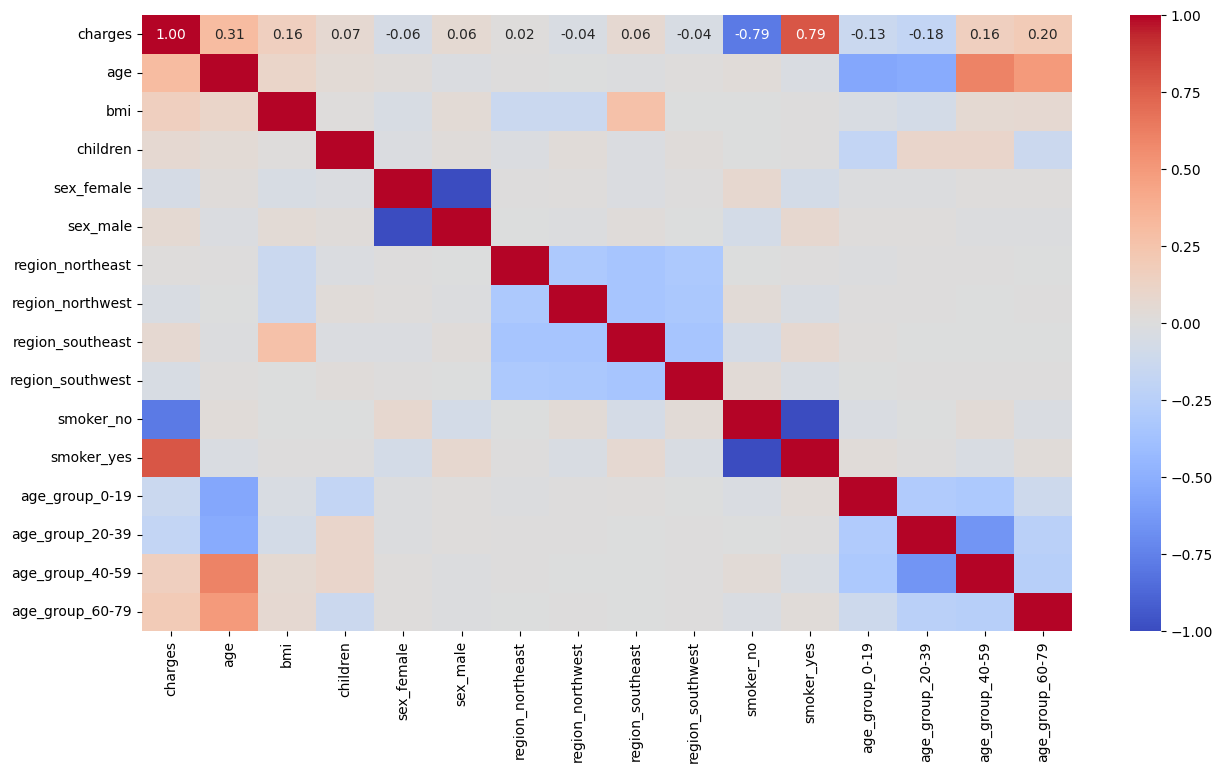

In [291]:
plt.figure(figsize=(15, 8))  # adjust width and height as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

"charges" exhibits the strongest correlation with "smoker" and "age," as indicated by the heatmap and correlation matrix.

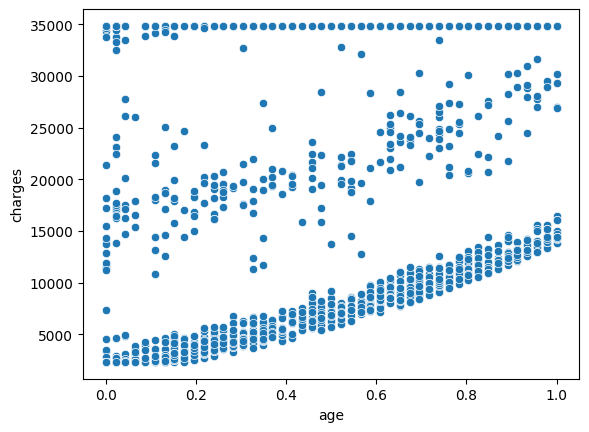

In [292]:
sns.scatterplot(x='age', y='charges', data=scaled_data_with_target)
plt.show()

## Define X, y & split dataset into train & test sets

In [311]:
X = insurance_df['age'].values.reshape(-1, 1) # reshape for assigning a column name to values as this is a single column numpy array
y = insurance_df['charges'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and fit a simple bivariate linear regression model

In [312]:
# initiate an empty model
bivariate_reg_model = LinearRegression()

# define a parameter grid for model optimisation
param_grid = {
			'fit_intercept': [True, False],
			'positive': [True, False]
			}
# instantiate GridSearchCV
grid_search = GridSearchCV(bivariate_reg_model, param_grid, cv=5)

# fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# get the best model from the grid search
best_model = grid_search.best_estimator_

# fit the best model to the training data
best_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = best_model.predict(X_test)

In [313]:
# intercept & coefficients of the trained insurance model 
print('Intercept: \n', best_model.intercept_)
print('Coefficients: \n', best_model.coef_)
print('Score: \n', best_model.score(X_test, y_test))

Intercept: 
 3876.928684191711
Coefficients: 
 [240.59655979]
Score: 
 0.12408973539501933


**Intercept:** The intercept term represents the value of the dependent variable (in this case, charges) when all independent variables (features) are zero. In this context, the intercept of approximately 3876.93 indicates that even if the age of the individual is zero, there would still be a predicted charge of around $3876.93. However, it's essential to remember that the interpretation of an intercept can sometimes be nonsensical, especially if it doesn't make sense for the independent variables to be zero.

**Coefficients:** The coefficient represents the change in the dependent variable (charges) for a one-unit change in the corresponding independent variable (age), holding all other variables constant. In this case, the coefficient of approximately 240.60 means that for every one-year increase in age, the predicted charge increases by approximately $240.60.

**Score (R-squared):** The R-squared value measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the R-squared value of approximately 0.12 suggests that around 12.4% of the variance in charges can be explained by the age alone. This means that the model explains only a small portion of the variability in charges, indicating that other factors besides age might influence the charges more significantly.

In [296]:
# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_square}")

Mean Squared Error: 94334457.99482302
R-squared: 0.13436431321943765


**Mean Squared Error (MSE):** The mean squared error measures the average of the squares of the errors between the actual values (y_test) and the predicted values (y_pred). In this case, the MSE of approximately 94334457.99 means that, on average, the squared difference between the actual charges and the predicted charges is around 94334457.99. Since the MSE is a squared metric, its value is sensitive to large errors, and a higher MSE indicates poorer model performance.

**R-squared (R2):** The R-squared value measures the proportion of the variance in the dependent variable (charges) that is explained by the independent variables (features) in the model. In this case, the R-squared value of approximately 0.134 indicates that around 13.4% of the variance in charges can be explained by the independent variables included in the model. However, this also means that approximately 86.6% of the variance in charges is not explained by the model. An R-squared value closer to 1 indicates a better fit of the model to the data, while a value closer to 0 suggests poor fit.

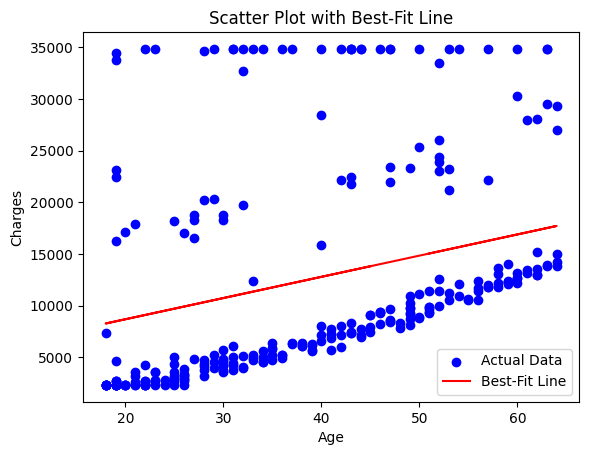

In [297]:
# plot the scatter plot with the best-fit line
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.plot(X_test, y_pred, color='r', label='Best-Fit Line')
plt.title('Scatter Plot with Best-Fit Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

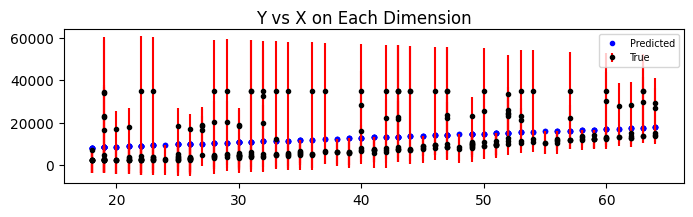

In [298]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
# ax[1].set_ylabel(insurance_df.columns[1])

# Get values for the error bar
error_bar_values = np.abs((y_test - y_pred))

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax.errorbar(X_test[:, i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax.scatter(X_test[:, i], y_pred, c='b', marker='.', label='Predicted')
    ax.legend(loc='best', fontsize='x-small')

In [299]:
# save the model
dump(best_model, 'insurance_bivariate_reg_model.joblib')

['insurance_bivariate_reg_model.joblib']

**NOTE:** To run the model, access and run **predict_insurance.ipynb** in the same directory.